<a href="https://colab.research.google.com/github/Harsha-m416/Stanford_Dogs_Data/blob/main/Mulinti_DM_Programming_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import os
import numpy as np
import pandas as pd
import warnings

from PIL import Image
from skimage.color import rgb2gray
import xml.etree.ElementTree as ET
from skimage import io, exposure, filters

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVR

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from google.colab import drive


import matplotlib.pyplot as plt

In [40]:
drive. mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
warnings.filterwarnings("ignore")

In [70]:
def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

In [71]:
image_dir = "/content/drive/MyDrive/data_mining/mulinti_images"
annotation_dir = "/content/drive/MyDrive/data_mining/mulinti_annotation"

In [72]:
class_names = ['Basenji','Airedale','Brittany_spaniel','Bouvier_des_flandres']

In [73]:
class_names

['Basenji', 'Airedale', 'Brittany_spaniel', 'Bouvier_des_flandres']

In [74]:
class_paths = []
for i in os.listdir(image_dir):
  for j in class_names:
    if j.lower() in i.lower():
      class_paths.append(i)

In [75]:
class_paths

['n02106382-Bouvier_des_Flandres',
 'n02101388-Brittany_spaniel',
 'n02096051-Airedale',
 'n02110806-basenji']

## Edge histogram Data

In [76]:
new_dir = "/content/drive/MyDrive/data_mining/processed"

In [77]:
df = pd.DataFrame(columns = list(range(0,36))+['class'])
for class_ in class_paths:
  class_path = os.path.join(new_dir,class_)
  for filename in os.listdir(class_path):
    img = io.imread(os.path.join(class_path,filename))
    gray_sacle = rgb2gray(img)
    angle_sobel = angle(filters.sobel_h(gray_sacle),
                    filters.sobel_v(gray_sacle))
    hist,bins = exposure.histogram(angle_sobel,nbins=36)
    for i in class_names:
      if i.lower() in class_.lower():
        break
    df.loc[len(df)] = list(hist)+[class_names.index(i)]




In [78]:
df.to_csv("/content/drive/MyDrive/data_mining/edge_data.csv")

## Split into Test Train

In [79]:
X = np.array(df[df.columns[:-1]])
y = np.array(df['class'])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Scale

In [81]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [82]:
scalled_x_train = scaler.transform(X_train)
scalled_x_test = scaler.transform(X_test)

## KNN K-fold

In [83]:
mean_val_errors_std = []
mean_val_errors_strat = []
mean_train_errors_std = []
mean_train_errors_strat = []
k_values = [1, 3, 5, 7, 10, 20]
for k in k_values:
    # Standard 5-fold cross-validation
    kf = KFold(n_splits=5)
    knn1 = KNeighborsClassifier(n_neighbors=k)
    val_scores_std = cross_val_score(knn1, scalled_x_train, y_train, cv=kf)
    train_scores_std = knn1.fit(scalled_x_train, y_train).score(scalled_x_train, y_train)
    mean_val_errors_std.append(1 - np.mean(val_scores_std))
    mean_train_errors_std.append(1 - train_scores_std)
    print(f"Standard 5-fold CV, k={k}: Train accuracy: {train_scores_std},Val accuracy: {np.mean(val_scores_std)}")
    knn2 = KNeighborsClassifier(n_neighbors=k)
    skf = StratifiedKFold(n_splits=5)
    val_scores_strat = cross_val_score(knn2, scalled_x_train, y_train, cv=skf)
    train_scores_strat = knn2.fit(scalled_x_train, y_train).score(scalled_x_train, y_train)
    mean_val_errors_strat.append(1 - np.mean(val_scores_strat))
    mean_train_errors_strat.append(1 - train_scores_strat)
    print(f"Stratified 5-fold CV, k={k}: Train accuracy: {train_scores_strat},Val accuracy {np.mean(val_scores_strat)}")


Standard 5-fold CV, k=1: Train accuracy: 0.9912280701754386,Val accuracy: 0.3017543859649122
Stratified 5-fold CV, k=1: Train accuracy: 0.9912280701754386,Val accuracy 0.2964912280701754
Standard 5-fold CV, k=3: Train accuracy: 0.5771929824561404,Val accuracy: 0.3263157894736842
Stratified 5-fold CV, k=3: Train accuracy: 0.5771929824561404,Val accuracy 0.33508771929824566
Standard 5-fold CV, k=5: Train accuracy: 0.531578947368421,Val accuracy: 0.2947368421052632
Stratified 5-fold CV, k=5: Train accuracy: 0.531578947368421,Val accuracy 0.30877192982456136
Standard 5-fold CV, k=7: Train accuracy: 0.5070175438596491,Val accuracy: 0.30701754385964913
Stratified 5-fold CV, k=7: Train accuracy: 0.5070175438596491,Val accuracy 0.3017543859649122
Standard 5-fold CV, k=10: Train accuracy: 0.45263157894736844,Val accuracy: 0.3157894736842105
Stratified 5-fold CV, k=10: Train accuracy: 0.45263157894736844,Val accuracy 0.3035087719298245
Standard 5-fold CV, k=20: Train accuracy: 0.4070175438596491

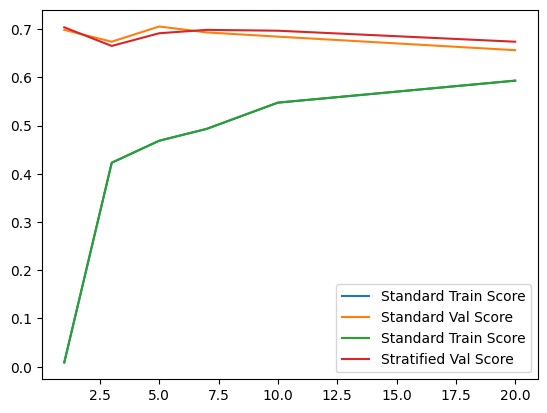

In [84]:
fig,ax = plt.subplots()
ax.plot(k_values,mean_train_errors_std,label="Standard Train Score")
ax.plot(k_values,mean_val_errors_std,label="Standard Val Score")
ax.plot(k_values,mean_train_errors_strat,label="Standard Train Score")
ax.plot(k_values,mean_val_errors_strat,label="Stratified Val Score")
ax.legend()
plt.show()

In [85]:
print(f"Lowest Standrad Training mean Error is {np.min(mean_train_errors_std)} at  k =  {k_values[np.argmin(mean_train_errors_std)]}")
print(f"Lowest Standrad Val mean Error is {np.min(mean_val_errors_std)}  at  k = {k_values[np.argmin(mean_val_errors_std)]}")
print(f"Lowest Stratified Training mean Error is {np.min(mean_train_errors_strat)} at k = {k_values[np.argmin(mean_train_errors_strat)]}")
print(f"Lowest Stratified Val mean Error is {np.min(mean_val_errors_strat)} at k = {k_values[np.argmin(mean_val_errors_strat)]}")

Lowest Standrad Training mean Error is 0.00877192982456143 at  k =  1
Lowest Standrad Val mean Error is 0.656140350877193  at  k = 20
Lowest Stratified Training mean Error is 0.00877192982456143 at k = 1
Lowest Stratified Val mean Error is 0.6649122807017543 at k = 3


Overfiting at K =1 as Train error is low and val error is high.

As Stratified Val error is lowest at k = 3

In [86]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scalled_x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [87]:
error = 1- knn.score(scalled_x_test,y_test)

In [88]:
error

0.6923076923076923

Test Score = 0.6923076923076923

## Performance Comparison

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
classifiers = {
    'Support Vector Machine': LinearSVR(),
    'Neural Network': MLPClassifier(hidden_layer_sizes = (10, 10, 10, )),
    'Ada Boost': AdaBoostClassifier()
}


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

val_scores_all = []
for clf_name, clf in classifiers.items():
    val_classifier_score = []
    for fold, (start_train_index, val_index) in enumerate(skf.split(scalled_x_train, y_train)):
        X_start_train, X_val = scalled_x_train[start_train_index], scalled_x_train[val_index]
        y_start_train, y_val = y_train[start_train_index], y_train[val_index]

        clf.fit(X_start_train, y_start_train)

        y_pred = clf.predict(X_val)
        if clf_name == "Support Vector Machine":
          y_pred = np.round(y_pred)

        val_k_fold_score= accuracy_score(y_val,y_pred)
        val_classifier_score.append(val_k_fold_score)

    val_scores_all.append((clf_name,val_classifier_score))


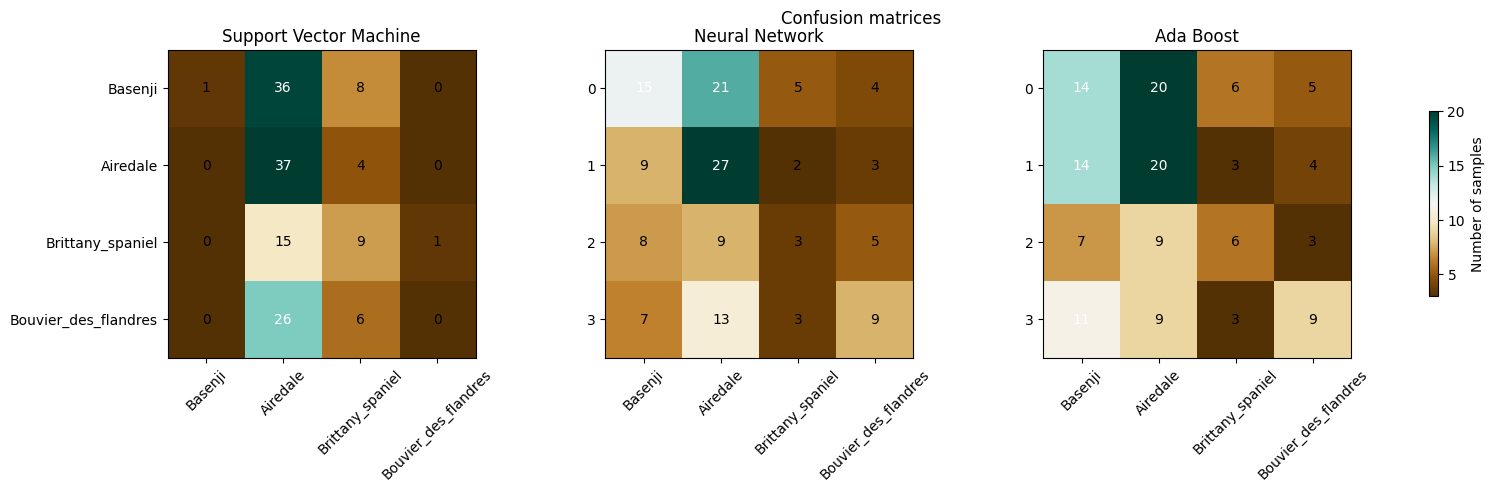

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(20,4))
for i, (clf_name,clf) in  enumerate(classifiers.items()):
  y_pred = clf.predict(scalled_x_test)
  if clf_name =="Support Vector Machine":
    y_pred = np.round(y_pred)
  cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
  ax = axes[i]
  im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.BrBG)
  ax.set_xticks(np.arange(len(class_names)))
  ax.set_yticks(np.arange(len(class_names)))
  ax.set_xticklabels(class_names,rotation=45)
  if i==0:
    ax.set_yticklabels(class_names)
  ax.set_title(f'{clf_name}')

  for i in range(len(class_names)):
      for j in range(len(class_names)):
          ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
cbar.ax.set_ylabel('Number of samples')

fig.suptitle(f'Confusion matrices')

plt.show()

7)i) Based on the Confusion matrix visualization ada boost as the it has best diagonal values for all class, even though the SVM have max values for one class but for other classes the values are low.

In [92]:
for clf_name, scores in val_scores_all:
  print(f"{clf_name} Mean Val accuracy accross K folds {np.mean(scores)}")

Support Vector Machine Mean Val accuracy accross K folds 0.29473684210526313
Neural Network Mean Val accuracy accross K folds 0.3614035087719298
Ada Boost Mean Val accuracy accross K folds 0.3473684210526316


7)ii) neural network is best method based on the mean validation accuracies

In [93]:
from sklearn.metrics import f1_score

In [94]:
scores = []
f_scores = []
for clf_name, clf in classifiers.items():
  clf.fit(scalled_x_train,y_train)
  y_pred = clf.predict(scalled_x_test)
  if clf_name == "Support Vector Machine":
    y_pred = np.round(y_pred)
  score = accuracy_score(y_test,y_pred)
  f1_micro = f1_score(y_test, y_pred, average='micro')

  f1_macro = f1_score(y_test, y_pred, average='macro')

  f1_weighted = f1_score(y_test, y_pred, average='weighted')

  scores.append(score)
  f_scores.append(np.mean([f1_micro,f1_macro,f1_weighted]))





In [95]:
for clf_name, acc, f1 in zip(classifiers,scores,f_scores):
  print(f"{clf_name} has Test accuracy  {acc} and F1 score {f1}")


Support Vector Machine has Test accuracy  0.3006993006993007 and F1 score 0.2307872954442429
Neural Network has Test accuracy  0.40559440559440557 and F1 score 0.3747759692240855
Ada Boost has Test accuracy  0.3006993006993007 and F1 score 0.2879437215589955


7)iii)&iv) Neural Network is best in both Test accuracy and F1 score